In [1]:
# autoenconder sample codes from https://blog.keras.io/building-autoencoders-in-keras.html

from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
import os

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.load_weights('ae_weights_best.h5')
checkpoint = ModelCheckpoint(filepath=os.path.join("ae_weights_best.h5"), monitor='val_loss', save_best_only=True, mode='auto')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[checkpoint])


C:\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.0997 - val_loss: 0.0980
Epoch 2/50
60000/60000 [==============================] - 8s 133us/step - loss: 0.0996 - val_loss: 0.1005
Epoch 3/50
60000/60000 [==============================] - 8s 128us/step - loss: 0.0994 - val_loss: 0.0990
Epoch 4/50
60000/60000 [==============================] - 8s 127us/step - loss: 0.0992 - val_loss: 0.0982
Epoch 5/50
60000/60000 [==============================] - 8s 128us/step - loss: 0.0990 - val_loss: 0.0987
Epoch 6/50
60000/60000 [==============================] - 8s 129us/step - loss: 0.0989 - val_loss: 0.0986
Epoch 7/50
60000/60000 [==============================] - 8s 130us/step - loss: 0.0988 - val_loss: 0.0981
Epoch 8/50
60000/60000 [==============================] - 8s 132us/step - loss: 0.0986 - val_loss: 0.0970
Epoch 9/50
60000/60000 [==============================] - 8s 129us/step - lo

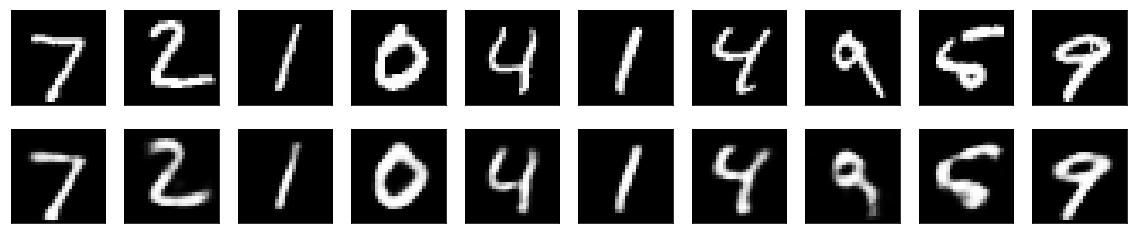

In [2]:
# Show autoenconder performance sample.
# rebulid the decoding layers 
# retrieve the last layer of the autoencoder model
decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]

decoded_output1 = Input(shape=(encoding_dim*2,))
decoded_output2 = Input(shape=(encoding_dim*4,))

# create the decoder model
decoder1 = Model(encoded_input, decoder_layer1(encoded_input))
decoder2 = Model(decoded_output1, decoder_layer2(decoded_output1))
decoder3 = Model(decoded_output2, decoder_layer3(decoded_output2))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded1 = decoder1.predict(encoded_imgs)
decoded2 = decoder2.predict(decoded1)
decoded_imgs = decoder3.predict(decoded2)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [3]:
# Create enoded core for K-means and t-sne input.

from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
import os

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
x_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
x_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.load_weights('ae_weights_best.h5')
encoded_core = encoder.predict(x_test[:1000,])
print(encoded_core)

(60000, 784)
(10000, 784)
[[ 8.673862   5.007514   9.233503  ...  2.807009   4.670768   5.075119 ]
 [ 4.093711   6.815804   6.238288  ...  5.8495855  9.111113  10.235785 ]
 [ 8.049682  11.999723  13.165847  ...  5.8192735  2.9524903  9.49319  ]
 ...
 [ 6.2447104  8.0025015  3.1635585 ...  5.400732   8.498783   7.652109 ]
 [ 5.345956   9.002041   6.225396  ...  4.4584193 17.575703   1.4423774]
 [ 3.7175434  4.2687263  4.283582  ...  3.082504   1.8567523  3.71191  ]]


In [4]:
# Cluster encoded cores using K-means.

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=20)
y_pred = kmeans.fit_predict(encoded_core)
print(y_pred)

[9 6 8 3 5 8 9 5 3 2 3 7 9 3 8 4 9 9 0 9 2 1 7 2 9 3 9 5 3 8 4 8 4 3 2 3 9
 8 4 8 8 9 9 4 8 4 8 6 5 5 1 0 2 4 7 1 5 8 5 2 5 2 9 6 2 9 7 5 0 3 9 3 3 2
 8 9 4 9 2 2 9 1 6 9 5 5 2 4 7 8 4 1 2 0 8 0 8 0 1 5 7 3 4 5 5 5 3 8 9 9 2
 8 4 9 9 1 9 5 9 3 0 1 9 1 9 5 3 2 0 2 1 1 0 9 2 8 3 8 7 2 1 9 4 8 2 8 2 6
 3 4 5 5 2 4 8 2 7 1 4 1 9 1 0 5 7 4 1 2 8 9 5 2 6 4 6 8 8 4 8 0 8 0 2 3 4
 9 6 4 3 8 2 8 3 5 3 4 8 1 9 6 0 7 8 8 8 4 9 4 6 5 5 2 5 8 5 3 4 2 2 4 9 6
 0 2 8 6 0 9 8 9 1 4 0 0 9 9 6 6 5 8 4 5 2 9 8 4 7 1 5 6 5 8 5 4 9 9 6 1 6
 7 2 2 9 9 4 8 0 8 4 3 4 3 8 9 5 5 8 0 6 8 6 2 9 2 5 6 1 5 8 4 5 6 5 6 3 5
 3 3 6 4 1 9 8 9 9 4 6 9 9 4 4 7 3 4 8 9 1 2 3 4 8 2 5 4 4 2 1 3 9 8 8 6 8
 4 4 4 5 9 4 1 1 9 8 4 4 8 2 0 8 9 8 0 3 7 2 2 4 8 9 9 5 7 9 8 4 3 7 4 1 4
 9 6 3 0 4 2 9 8 8 5 3 9 0 9 7 8 1 6 8 9 7 2 1 8 9 4 6 4 5 5 3 4 4 9 6 5 0
 3 4 8 9 9 0 9 9 9 8 9 6 8 2 3 9 6 3 5 9 8 2 4 8 4 5 2 9 2 2 0 9 1 3 3 0 1
 2 3 1 2 2 0 0 0 6 4 5 8 4 1 2 3 9 7 7 7 2 0 2 6 2 0 4 9 7 8 0 5 8 6 1 4 8
 5 9 2 9 3 2 5 9 8 3 2 3 

In [5]:
# Get t-sne coordinates.

from sklearn.manifold import TSNE

X_tsne = TSNE(learning_rate=100).fit_transform(encoded_core)
print(X_tsne)

[[-27.47613    -25.108494  ]
 [ 36.508495    -3.2405605 ]
 [ 20.100946   -35.295547  ]
 ...
 [ 10.437451    40.634644  ]
 [ -0.9011459   16.514582  ]
 [-30.445524    -0.93468285]]


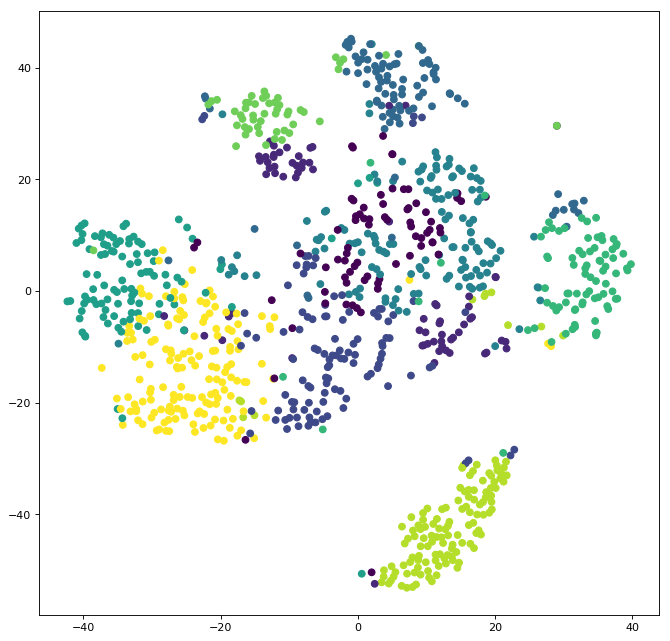

In [6]:
# Plot t-sne coordinates.

from matplotlib.figure import *
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='viridis')
plt.show()